# Problem: 

Dostarczamy towar odbiorcom. Każdy odbiorca ma fizyczną siedzibę. Chcemy wybudować $k$ punktów dystrybucji tak aby najłatwiej obsłużyć wszystkich odbiorców. Mogą to być odbiorcy telefoni komórkowej i chcemy ustawić wieże nadawcze. 

Gdzie powinnośmy umieścić nasze punkty dystrybucji?

# Umieszczamy tak żeby suma odległości odbiorców od punktów dystrybucji była minimalna

Załóżmy że umieszczamy **jeden punkt** dla wszystkich klientów. 

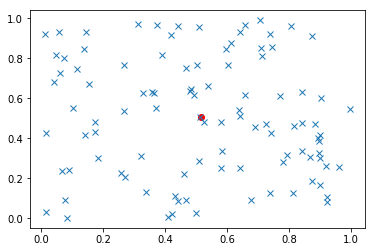

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 100

X = np.random.rand(n,2)


m = [X[:,0].mean(), X[:,1].mean()]


plt.plot(X[:,0], X[:,1],'x')
plt.scatter(m[0],m[1],color = 'r')
plt.show()

* Średnia to element minimalizujący sumę kwadratów odległości.

Załóżmy teraz że chcemy umieścić **$k$ centrów**. Jak je umieścić?

Proszę zaproponować i zaimplementować.

In [3]:
#dzielimy na dwie grupy i w każdej grupie bierzemy średnią - jak podzielić? Trzeba iteracyjnie jak poniżej

# 1. Losowo wybierz $k$ centroidy z punktów jako początkowe centroidy grup.
# 2. Przypisz każdą próbkę do najbliższego centroidu $\mu^(j)$ dla $j \in 1, \ldots, k$.
# 3. Wylicz nowe centroidy środki nowo powstałych grup.
# 4. Powtórz kroki 2 i 3, dopóki 
#   * przynależność do grup wszytkich punktów się nie zmienia 
#   * lub zmiana funkcji kosztu jest mniejsza niż tolerancja zdefiniowana przez użytkownika 
#   * lub zostanie osiągnięta maksymalna liczba iteracji.

from scipy.spatial import distance

def kMeans(X, K, maxIters = 10):

    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([distance.sqeuclidean(x_i,y_k) for y_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return np.array(centroids) , C

In [4]:
m, C = kMeans(X,2)
print(C)
print(m)

[0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1]
[[0.67554965 0.29148842]
 [0.32126887 0.73758894]]


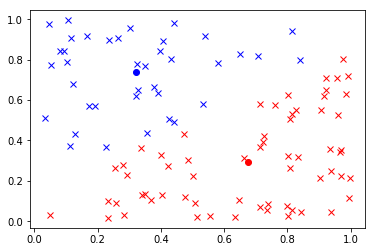

In [5]:
plt.plot(X[np.where(C == 0),0], X[np.where(C == 0),1],'x', color = 'r')
plt.scatter(m[0,0],m[0,1],color = 'r')

plt.plot(X[np.where(C == 1),0], X[np.where(C == 1),1],'x', color = 'b')
plt.scatter(m[1,0],m[1,1],color = 'b')

plt.show()

Chociaż algorytm grupowania danych k-means może być zastosowane do danych w wysokich wymiarach my zaczniemy od bardzo prostych danych.

# Zad: 
Prosze wygenerować dane z 3 blobów na płaszczyźnie i narysować zaznaczając osobnym kolorem każdy blob.

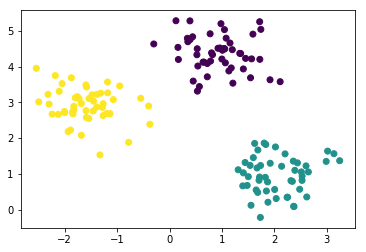

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

W rzeczywistych zastosowaniach klastrowania (analizy skupień), nie mamy żadnej informacji na temat tych próbek (w przeciwnym razie należałoby do kategorii nauki nadzorowanej). 

W rzeczywistych zastosowaniach klastrowania (analizy skupień), nie mamy żadnej informacji na temat tych próbek (w przeciwnym razie należałoby do kategorii nauki nadzorowanej). 

Dlatego naszym celem jest grupowanie próbek w oparciu o podobieństwo poszczegulnych punktów, które możemy osiągnąć za pomocą algorytmu k-średnich, który można podsumować w czterech następujących krokach:

1. Losowo wybierz $k$ centroidy z punktów jako początkowe centroidy grup.
2. Przypisz każdą próbkę do najbliższego centroidu $\mu^{(j)}$ dla $j \in 1, \ldots, k$.
3. Wylicz nowe centroidy środki nowo powstałych grup.
4. Powtórz kroki 2 i 3, dopóki 
  * przynależność do grup wszytkich punktów się nie zmienia 
  * lub zmiana funkcji kosztu jest mniejsza niż tolerancja zdefiniowana przez użytkownika 
  * lub zostanie osiągnięta maksymalna liczba iteracji.

# Przykład

  * ustawiamy liczbę żądanych klastrów na 3 (określenie liczby klastrów a priori jest jednym z ograniczeń metody k-means)   *     * ustawiamy n_init = 10, aby uruchamiać algorytmy k-średnich klastrów 10 razy niezależnie z różnymi losowymi centroidami, aby wybrać ostateczny model z najniższym SSE. 
  * Poprzez parametr max_iter określamy maksymalną liczbę iteracji dla każdego pojedynczego uruchomienia (tutaj, 300). 
    * Zauważ, że implementacja k-means w **scikit-learn** zatrzymuje się wcześniej jeśli osiągnie zbierzność.
    * Możliwe jest, że algorytm k-means nie osiągną zbieżności dla określonego przebiegu co może być kosztowne obliczeniowo (dla dużych max_iter). 
    * Jednym ze sposobów radzenia sobie z problemami zbieżności jest wybór większych wartości dla parametru tol, który kontroluje tolerancję w odniesieniu do zmian SSE. 

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)



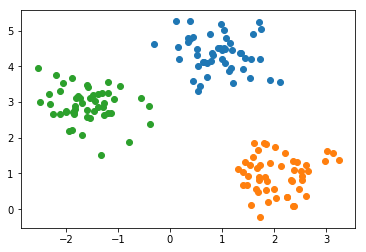

In [4]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            label='cluster 3')
plt.show()